In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv('/content/Loan payments data.csv')
df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [4]:
df.isnull().sum()

,0
Loan_ID,0
loan_status,0
Principal,0
terms,0
effective_date,0
due_date,0
paid_off_time,100
past_due_days,300
age,0
education,0


In [5]:
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

In [6]:
le_edu = LabelEncoder()
df['education'] = le_edu.fit_transform(df['education'])

le_status = LabelEncoder()
df['loan_status'] = le_status.fit_transform(df['loan_status'])

In [7]:
X = df[['Principal', 'terms', 'age', 'education', 'Gender']]
y = df['loan_status']

In [8]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [10]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.47      0.51        99
           1       0.57      0.51      0.54        88
           2       0.43      0.54      0.48        83

    accuracy                           0.51       270
   macro avg       0.51      0.51      0.51       270
weighted avg       0.52      0.51      0.51       270



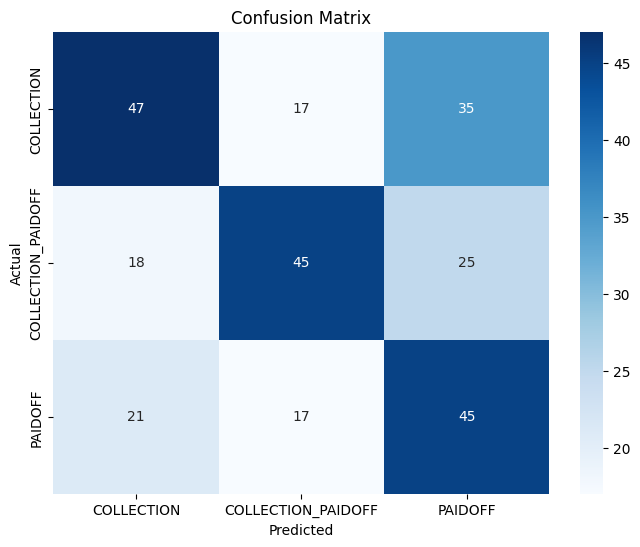

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_status.classes_, yticklabels=le_status.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

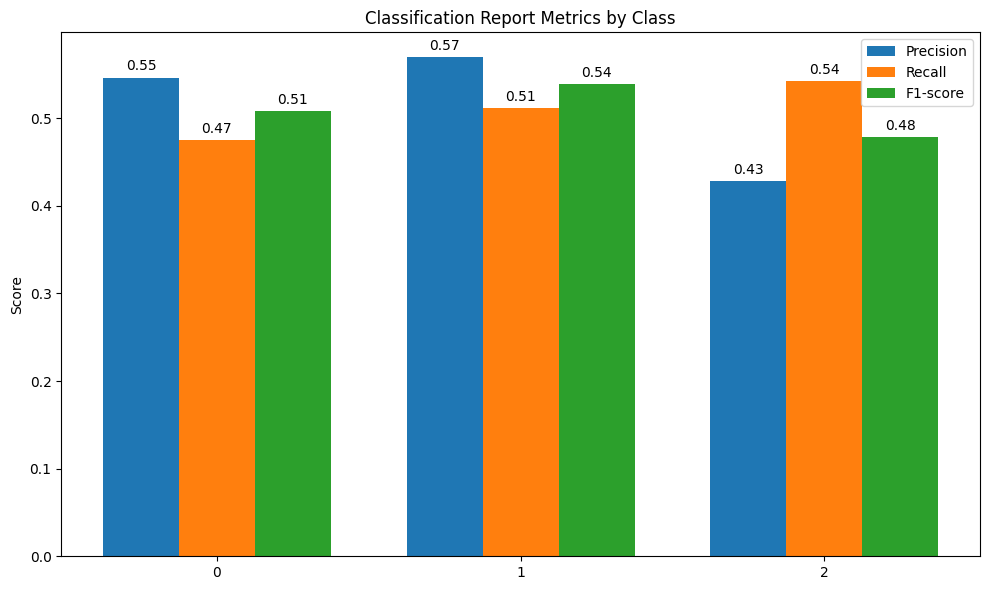

In [13]:
y_pred = rf_model.predict(X_test)

In [14]:
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_status.classes_))

Model Accuracy: 0.5074074074074074

Classification Report:
                     precision    recall  f1-score   support

        COLLECTION       0.55      0.47      0.51        99
COLLECTION_PAIDOFF       0.57      0.51      0.54        88
           PAIDOFF       0.43      0.54      0.48        83

          accuracy                           0.51       270
         macro avg       0.51      0.51      0.51       270
      weighted avg       0.52      0.51      0.51       270



In [15]:
def predict_loan(principal, terms, age, education, gender):
    edu_encoded = le_edu.transform([education])[0]
    gender_encoded = le_gender.transform([gender])[0]
    new_data = pd.DataFrame([[principal, terms, age, edu_encoded, gender_encoded]],
                            columns=['Principal', 'terms', 'age', 'education', 'Gender'])
    pred = rf_model.predict(new_data)[0]
    return le_status.inverse_transform([pred])[0]


In [16]:
print("\nPrediction for New Applicant:")
print(predict_loan(principal=1000, terms=30, age=25, education="Bechalor", gender="female"))


Prediction for New Applicant:
COLLECTION


In [17]:
# Example usage:
principal = 1000
terms = 30
age = 25
education = "Bechalor"
gender = "female"

prediction = predict_loan(principal, terms, age, education, gender)
print(f"The predicted loan status for the applicant is: {prediction}")

The predicted loan status for the applicant is: COLLECTION


In [18]:
principal = 2000
terms = 39
age = 45
education = "Bechalor"
gender = "male"
prediction = predict_loan(principal, terms, age, education, gender)
print(f"The predicted loan status for the applicant is: {prediction}")

The predicted loan status for the applicant is: COLLECTION


In [19]:
principal = 2000
terms = 39
age = 45
education = "Bechalor"
gender = "male"
prediction = predict_loan(principal, terms, age, education, gender)
print(f"The predicted loan status for the applicant is: {prediction}")

The predicted loan status for the applicant is: COLLECTION


In [20]:
# Example: Predict PAIDOFF (likely approved loan)
paid_example = predict_loan(
    principal=800,      # smaller loan amount
    terms=30,           # standard term
    age=35,             # mature age
    education="Bechalor",
    gender="female"
)
print("Prediction (Should be PAIDOFF):", paid_example)


# Example: Predict DEFAULT / COLLECTION (likely not approved)
default_example = predict_loan(
    principal=1200,     # higher loan amount
    terms=15,           # short repayment time
    age=21,             # younger age
    education="High School or Below",
    gender="male"
)
print("Prediction (Should be COLLECTION):", default_example)


Prediction (Should be PAIDOFF): PAIDOFF
Prediction (Should be COLLECTION): COLLECTION_PAIDOFF
